# Project 1: Methods For High-Dimensional Space Visualization Using Spotify Song Data
In this project, I had the opportunty to carry out the following tasks:
- Scrapped Spotify Song Data for multiple playlists
- Built a dataset out of the extracted information
- Used T-SNE to visualize relationships between data points in  high-dimensional spaces
- Was able to tell certain genres appart by looking at the regions where data points were more densely packed

In [1]:
#To begin with, we load the dataset created with the data I scrapped from Spotify's API
import pandas as pd
import plotly.express as px
df = pd.read_csv('SpotifyMexScored.csv')
df.head()

,cancion,artista,playlist,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,Lista Rep,liked
0,Immortal Rites,Morbid Angel,4tszLL7NTfLCoIz39Zsiy1,5hmek3mrSYvfSElBsPNbxo,0.190,0.934,1,-7.796,0.0560,0.000008,0.107,0.3630,0.360,Death Metal,1
1,Chopped in Half,Obituary,4tszLL7NTfLCoIz39Zsiy1,01cGujYWGF7JchJLSgf6Ta,0.257,0.989,10,-5.918,0.0867,0.000007,0.521,0.2630,0.385,Death Metal,1
2,Left Hand Path,Entombed,4tszLL7NTfLCoIz39Zsiy1,5faD0zZ9fMa3J5ZN3lIWtp,0.166,0.927,7,-8.797,0.0736,0.000004,0.651,0.3440,0.219,Death Metal,1
3,Pull the Plug,Death,4tszLL7NTfLCoIz39Zsiy1,2l0h4aBFLp9HdoaNdCTlbW,0.226,0.978,9,-5.729,0.2090,0.000004,0.533,0.0436,0.242,Death Metal,1
4,Into The Grave,Grave,4tszLL7NTfLCoIz39Zsiy1,4bAIIhqJeOTDcyeo1GvIMo,0.295,0.915,1,-6.968,0.0954,0.000003,0.910,0.0772,0.343,Death Metal,1


In [2]:
#And then define which are the numeric columns which will be used in subsequent steps
X = df[['danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']]

In [3]:
#Since all of them are numeric, we'll only normalize the same
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
#And then, we'll use TSNE to reduce the number of components all the way down to 2 in order to be able to visualize all data and it's potential relationships
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
X_transformed = model.fit_transform(X_scaled)


c:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [5]:
#TNSE values are calculated and assigned to every row
tsne1 = [value[0] for value in X_transformed]
tsne2 = [value[1] for value in X_transformed]
df['TSNE_1'] = tsne1
df['TSNE_2'] = tsne2
df.head()

,cancion,artista,playlist,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,Lista Rep,liked,TSNE_1,TSNE_2
0,Immortal Rites,Morbid Angel,4tszLL7NTfLCoIz39Zsiy1,5hmek3mrSYvfSElBsPNbxo,0.190,0.934,1,-7.796,0.0560,0.000008,0.107,0.3630,0.360,Death Metal,1,-23.384544,7.670085
1,Chopped in Half,Obituary,4tszLL7NTfLCoIz39Zsiy1,01cGujYWGF7JchJLSgf6Ta,0.257,0.989,10,-5.918,0.0867,0.000007,0.521,0.2630,0.385,Death Metal,1,-21.633713,40.268944
2,Left Hand Path,Entombed,4tszLL7NTfLCoIz39Zsiy1,5faD0zZ9fMa3J5ZN3lIWtp,0.166,0.927,7,-8.797,0.0736,0.000004,0.651,0.3440,0.219,Death Metal,1,-22.408464,42.150024
3,Pull the Plug,Death,4tszLL7NTfLCoIz39Zsiy1,2l0h4aBFLp9HdoaNdCTlbW,0.226,0.978,9,-5.729,0.2090,0.000004,0.533,0.0436,0.242,Death Metal,1,-26.398638,38.576771
4,Into The Grave,Grave,4tszLL7NTfLCoIz39Zsiy1,4bAIIhqJeOTDcyeo1GvIMo,0.295,0.915,1,-6.968,0.0954,0.000003,0.910,0.0772,0.343,Death Metal,1,-25.177782,47.225632


In [6]:
#And finally, an interactive graph of this results is generated
#It is interesting to see that certian genres can be visually told appart from others in a graphic way merely by considering their TSNE values
fig = px.scatter(df, x="TSNE_1", y="TSNE_2", color="Lista Rep", hover_data=['cancion'], template="plotly_dark")
fig.show()

<AxesSubplot:xlabel='TSNE_1', ylabel='TSNE_2'>

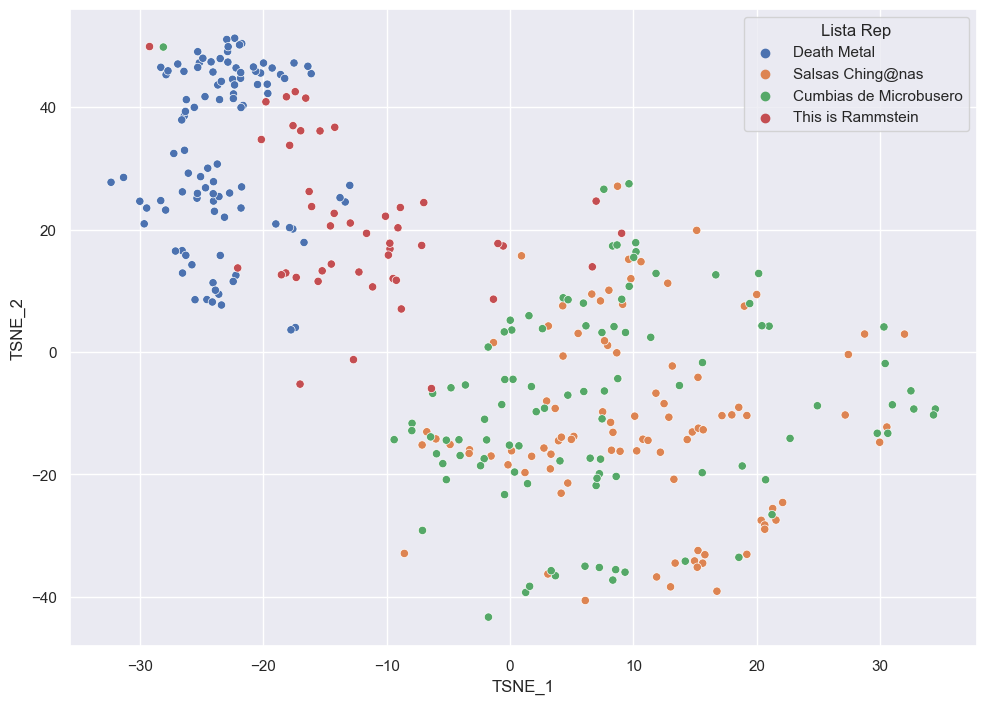

In [12]:
#This cell has been added to work around Githubs limitations for interactive visualizations
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
displayed_playlists = ['Death Metal', 'This is Rammstein', 'Salsas Ching@nas', 'Cumbias de Microbusero']
graph_df = df[df['Lista Rep'].isin(displayed_playlists)]
sns.scatterplot(x=graph_df['TSNE_1'],y=graph_df['TSNE_2'], hue=graph_df['Lista Rep'] )